In [99]:
import pandas as pd

df_orig = pd.read_csv(r'C:\Users\Котя\Downloads\Airbnb_Open_Data.csv', low_memory=False)
df = df_orig.copy()

In [100]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [102]:
# Separating numeric data from categorical data 

cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(exclude=['object'])

In [103]:
print("Non-Numeric columns:")
for cat_data in cat_df.columns:
    print(f"{cat_data}")

Non-Numeric columns:
NAME
host_identity_verified
host name
neighbourhood group
neighbourhood
country
country code
instant_bookable
cancellation_policy
room type
price
service fee
last review
house_rules
license


In [104]:
print("Numeric columns:")
for num_data in num_df.columns:
    print(f"{num_data}")

Numeric columns:
id
host id
lat
long
Construction year
minimum nights
number of reviews
reviews per month
review rate number
calculated host listings count
availability 365


In [105]:
# Missing data

missing = df.isnull().sum()

In [106]:
# Percentage missing

perc_missing = df.isna().mean() * 100
perc_missing.sort_values(ascending=False) 

license                           99.998051
house_rules                       50.810437
last review                       15.490404
reviews per month                 15.476759
country                            0.518524
availability 365                   0.436651
minimum nights                     0.398639
host name                          0.395715
review rate number                 0.317742
calculated host listings count     0.310919
host_identity_verified             0.281679
service fee                        0.266084
NAME                               0.243667
price                              0.240743
Construction year                  0.208579
number of reviews                  0.178364
country code                       0.127682
instant_bookable                   0.102340
cancellation_policy                0.074075
neighbourhood group                0.028265
neighbourhood                      0.015595
long                               0.007797
lat                             

In [107]:
# Droping columns

cols_to_drop = ['license', 'house_rules']
df.drop(cols_to_drop, axis = 1, inplace = True)

In [108]:
# Dropping rows

df.dropna(how = 'any', axis = 0, inplace = True)

In [110]:
df.head(10)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009.0,"$1,060",$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,2005.0,"$1,018",$204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,...,2015.0,$291,$58,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0
10,1006859,Cute & Cozy Lower East Side 1 bdrm,1280143094,verified,Miranda,Manhattan,Chinatown,40.71344,-73.99037,United States,...,2004.0,$319,$64,1.0,160.0,6/9/2019,1.33,3.0,4.0,1.0
11,1007411,Beautiful 1br on Upper West Side,18824631834,verified,Alan,Manhattan,Upper West Side,40.80316,-73.96545,United States,...,2008.0,$606,$121,5.0,53.0,6/22/2019,0.43,4.0,1.0,163.0
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,2010.0,$580,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0


In [111]:
# Spelling errors

df['neighbourhood group'].value_counts()

Brooklyn         34827
Manhattan        34755
Queens           11189
Bronx             2284
Staten Island      822
brookln              1
Name: neighbourhood group, dtype: int64

In [112]:
df['neighbourhood group'].replace('brookln', 'Brooklyn', inplace=True)
df['neighbourhood group'].value_counts()

Brooklyn         34828
Manhattan        34755
Queens           11189
Bronx             2284
Staten Island      822
Name: neighbourhood group, dtype: int64

In [113]:
pd.set_option('display.max_rows', None)

In [114]:
df['neighbourhood'].value_counts().tail(20)

West Farms                    6
Bull's Head                   6
Emerson Hill                  6
Little Neck                   6
Howland Hook                  6
Prince's Bay                  5
Co-op City                    5
Westerleigh                   5
Eltingville                   5
Richmondtown                  5
Holliswood                    5
Bay Terrace, Staten Island    4
Gerritsen Beach               3
Lighthouse Hill               3
Willowbrook                   3
Rossville                     3
Glen Oaks                     2
Woodrow                       1
Chelsea, Staten Island        1
New Dorp                      1
Name: neighbourhood, dtype: int64

In [115]:
df['country'].value_counts()

United States    83878
Name: country, dtype: int64

In [116]:
df.rename(columns = {'availability 365':'availability', 'review rate number':'rating'}, inplace = True)

In [117]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,rating,calculated host listings count,availability
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009.0,"$1,060",$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0


In [118]:
# Changing data types

df['Construction year'].dtype

dtype('float64')

In [119]:
df['Construction year'] = pd.to_datetime(df['Construction year'], format = '%Y')
df['Construction year'] = df['Construction year'].dt.year

In [144]:
df[['minimum nights', 'number of reviews', 
    'calculated host listings count', 'availability']] = df[['minimum nights','number of reviews', 
    'calculated host listings count', 'availability']].astype('int')

In [153]:
df['last review'] = pd.to_datetime(df['last review']) 

In [137]:
# Removing the $ and commas

df['service fee'] = df['service fee'].str.replace('$','', regex = True)
df['price'] = df['price'].str.replace('$','', regex = True)
df['price'] = df['price'].str.replace(',','', regex = True)

In [141]:
df[['service fee', 'price']] = df[['service fee', 'price']].astype('int')

In [154]:
# Checking

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83878 entries, 0 to 102597
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83878 non-null  int64         
 1   NAME                            83878 non-null  object        
 2   host id                         83878 non-null  int64         
 3   host_identity_verified          83878 non-null  object        
 4   host name                       83878 non-null  object        
 5   neighbourhood group             83878 non-null  object        
 6   neighbourhood                   83878 non-null  object        
 7   lat                             83878 non-null  float64       
 8   long                            83878 non-null  float64       
 9   country                         83878 non-null  object        
 10  country code                    83878 non-null  object        
 11  i

In [155]:
df.head(10)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,rating,calculated host listings count,availability
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020,966,193,10,9,2021-10-19,0.21,4.0,6,286
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007,142,28,30,45,2022-05-21,0.38,4.0,2,228
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009,204,41,10,9,2018-11-19,0.10,3.0,1,289
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013,577,115,3,74,2019-06-22,0.59,3.0,1,374
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009,1060,212,45,49,2017-10-05,0.40,5.0,1,219
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,2005,1018,204,2,430,2019-06-24,3.47,3.0,1,180
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,...,2015,291,58,2,118,2017-07-21,0.99,5.0,1,375
10,1006859,Cute & Cozy Lower East Side 1 bdrm,1280143094,verified,Miranda,Manhattan,Chinatown,40.71344,-73.99037,United States,...,2004,319,64,1,160,2019-06-09,1.33,3.0,4,1
11,1007411,Beautiful 1br on Upper West Side,18824631834,verified,Alan,Manhattan,Upper West Side,40.80316,-73.96545,United States,...,2008,606,121,5,53,2019-06-22,0.43,4.0,1,163
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,Brooklyn,South Slope,40.66829,-73.98779,United States,...,2010,580,116,4,167,2019-06-24,1.34,4.0,3,47


In [162]:
# Renaming columns

df.rename(columns = {'NAME':'name', 'Construction_year':'construction_year'}, inplace=True)
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,rating,calculated_host_listings_count,availability
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020,966,193,10,9,2021-10-19,0.21,4.0,6,286
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007,142,28,30,45,2022-05-21,0.38,4.0,2,228
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009,204,41,10,9,2018-11-19,0.10,3.0,1,289
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013,577,115,3,74,2019-06-22,0.59,3.0,1,374
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009,1060,212,45,49,2017-10-05,0.40,5.0,1,219


In [163]:
df.columns = df.columns.str.replace(" ", "_")
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,rating,calculated_host_listings_count,availability
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020,966,193,10,9,2021-10-19,0.21,4.0,6,286
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007,142,28,30,45,2022-05-21,0.38,4.0,2,228
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009,204,41,10,9,2018-11-19,0.10,3.0,1,289
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013,577,115,3,74,2019-06-22,0.59,3.0,1,374
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009,1060,212,45,49,2017-10-05,0.40,5.0,1,219


In [164]:
# Duplicates

df.duplicated().any()

True

In [ ]:
df.drop_duplicates()

<Axes: >

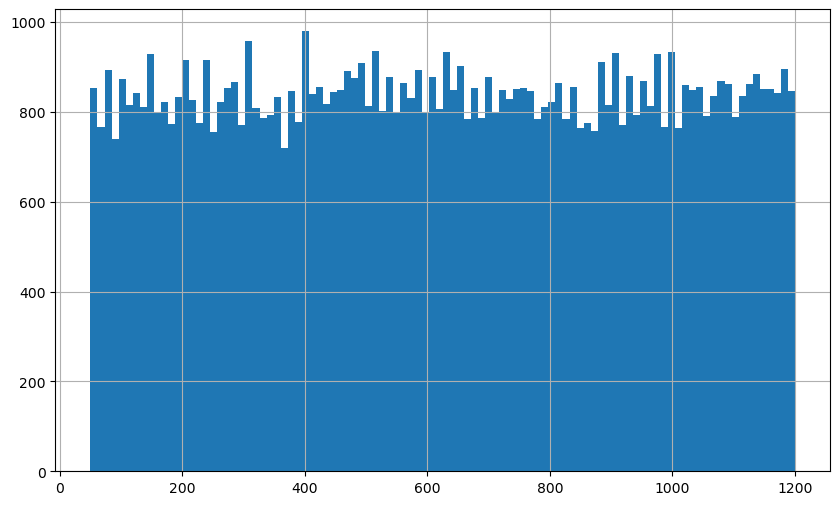

In [170]:
# Outlies

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
df['price'].hist(bins=100)

In [171]:
df['price'].describe()

count    83878.000000
mean       626.164143
std        331.797762
min         50.000000
25%        340.000000
50%        625.000000
75%        914.000000
max       1200.000000
Name: price, dtype: float64